## Data Descriptions

### Kidney Disease Dataset

Predicting Chronic Kidney Disease based on health records.

Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).

**Problem Statement :** Classify whether the patients have "Classification" column 'ckd' or 'notckd'. This means whether the patient has kidney disorder or not.

In [7]:
# Importing the dataset and libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# your_path = r"C:\Users\xsmaddurve\Downloads\Chaitanya_Pratice\Decicion_Tree_models\\" 
kidney_df = pd.read_csv('attachment_kidney_disease_lyst5204.csv')

In [9]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
report = pandas_profiling.ProfileReport(kidney_df) 
report.to_file(output_file="Kidney_Disease_dataset_Prandas_profiing.html")

NameError: name 'pandas_profiling' is not defined

## Perform feature engineering on the columns to remove all the categorical columns and object datatype columns

** There are a lot of object data types. We need to convert them to numeric before any further processing **

In [10]:
kidney_df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [11]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

** These columns have numerical values but have object dtype **

In [16]:
#These columns have \t? values

kidney_df.drop(kidney_df.index[[66,214,185, 133, 162]], inplace=True)

In [19]:
kidney_df.loc[[66,214,185, 133, 162]]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.020,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd
214,214,68.0,80.0,1.015,0.0,0.0,NaN,abnormal,notpresent,notpresent,...,\t43,4900,5.2,no,yes,no,good,no,no,ckd
185,185,4.0,NaN,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd
133,133,70.0,100.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,...,37,\t8400,8.0,yes,no,no,good,no,no,ckd
162,162,59.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,37,6000,\t?,no,yes,no,good,no,no,ckd


In [17]:
kidney_df[['pcv','wc','rc']] = kidney_df[['pcv','wc','rc']].apply(pd.to_numeric)

** These columns are categorical **

In [18]:
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [19]:
for x in kidney_df:
    print(x + " column :: " )
    kidney_df[x].unique()

id column :: 


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 18

age column :: 


array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  3.,  6., 32., 80., 49., 90., 78., 19.,
        2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

bp column :: 


array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

sg column :: 


array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

al column :: 


array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

su column :: 


array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

rbc column :: 


array([nan, 'normal', 'abnormal'], dtype=object)

pc column :: 


array(['normal', 'abnormal', nan], dtype=object)

pcc column :: 


array(['notpresent', 'present', nan], dtype=object)

ba column :: 


array(['notpresent', 'present', nan], dtype=object)

bgr column :: 


array([121.,  nan, 423., 117., 106.,  74., 100., 410., 138.,  70., 490.,
       380., 208.,  98., 157.,  76.,  99., 114., 263., 173.,  95., 108.,
       156., 264., 123.,  93., 107., 159., 140., 171., 270.,  92., 137.,
       204.,  79., 207., 124., 144.,  91., 162., 246., 253., 141., 182.,
        86., 150., 146., 425., 112., 250., 360., 163., 129., 133., 102.,
       158., 165., 132., 104., 127., 415., 169., 251., 109., 280., 210.,
       219., 295.,  94., 172., 101., 298., 153.,  88., 226., 143., 115.,
        89., 297., 233., 294., 323., 125.,  90., 308., 118., 224., 128.,
       122., 214., 213., 268., 256.,  84., 105., 288., 139.,  78., 273.,
       242., 424., 303., 148., 160., 192., 307., 220., 447., 309.,  22.,
       111., 261., 215., 234., 131., 352.,  80., 239., 110., 130., 184.,
       252., 113., 230., 341., 255., 103., 238., 248., 120., 241., 269.,
       201., 203., 463., 176.,  82., 119.,  97.,  96.,  81., 116., 134.,
        85.,  83.,  87.,  75.])

bu column :: 


array([ 36. ,  18. ,  53. ,  56. ,  26. ,  25. ,  54. ,  31. ,  60. ,
       107. ,  55. ,  72. ,  86. ,  90. , 162. ,  46. ,  87. ,  27. ,
       148. , 180. , 163. ,   nan,  50. ,  75. ,  45. ,  28. , 155. ,
        33. ,  39. , 153. ,  29. ,  65. , 103. ,  70. ,  80. ,  20. ,
       202. ,  77. ,  89. ,  24. ,  17. ,  32. , 114. ,  66. ,  38. ,
       164. , 142. ,  96. , 391. ,  15. , 111. ,  73. ,  19. ,  92. ,
        35. ,  16. , 139. ,  48. ,  85. ,  98. , 186. ,  37. ,  47. ,
        52. ,  82. ,  51. , 106. ,  22. , 217. ,  88. , 118. ,  50.1,
        71. ,  34. ,  40. ,  21. , 219. ,  30. , 125. , 166. ,  49. ,
       208. , 176. ,  68. , 145. , 165. , 322. ,  23. , 235. , 132. ,
        76. ,  42. ,  44. ,  41. , 113. ,   1.5, 146. ,  58. , 133. ,
       137. ,  67. , 115. , 223. ,  98.6, 158. ,  94. ,  74. , 150. ,
        61. ,  57. ,  95. , 191. ,  93. , 241. ,  64. ,  79. , 215. ,
       309. ,  10. ])

sc column :: 


array([ 1.2 ,  0.8 ,  1.8 ,  3.8 ,  1.4 ,  1.1 , 24.  ,  1.9 ,  7.2 ,
        4.  ,  2.7 ,  2.1 ,  4.6 ,  4.1 ,  9.6 ,  2.2 ,  5.2 ,  1.3 ,
        1.6 ,  3.9 , 76.  ,  7.7 ,   nan,  2.4 ,  7.3 ,  1.5 ,  2.5 ,
        2.  ,  3.4 ,  0.7 ,  1.  , 10.8 ,  6.3 ,  5.9 ,  0.9 ,  3.  ,
        3.25,  9.7 ,  6.4 ,  3.2 , 32.  ,  0.6 ,  6.1 ,  3.3 ,  6.7 ,
        8.5 ,  2.8 , 15.  ,  2.9 ,  1.7 ,  3.6 ,  5.6 ,  6.5 ,  4.4 ,
       10.2 , 11.5 ,  0.5 , 12.2 ,  5.3 ,  9.2 , 13.8 , 16.9 ,  6.  ,
        7.1 , 18.  ,  2.3 , 13.  , 48.1 , 14.2 , 16.4 ,  2.6 ,  7.5 ,
        4.3 , 18.1 , 11.8 ,  9.3 ,  6.8 , 13.5 , 12.8 , 11.9 , 12.  ,
       13.4 , 15.2 , 13.3 ,  0.4 ])

sod column :: 


array([  nan, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
       141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
       125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
       147. , 115. , 145. , 113. , 124. , 120. , 150. , 144. ])

pot column :: 


array([ nan,  2.5,  3.2,  4. ,  3.7,  4.2,  5.8,  3.4,  6.4,  4.9,  4.1,
        4.3,  5.2,  3.8,  4.6,  3.9,  4.7,  5.9,  4.8,  4.4,  6.6, 39. ,
        5.5,  5. ,  3.5,  3.6,  7.6,  2.9,  4.5,  5.7,  5.4,  5.3, 47. ,
        6.3,  5.1,  5.6,  3. ,  2.8,  2.7,  6.5,  3.3])

hemo column :: 


array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9,  nan, 11.1,
        9.9, 12.5, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6,
       13.6, 10.2, 10.5,  6.6, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1,
       11.9, 13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. ,
       11.8, 11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,
        9. ,  8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8,
       11.5,  7.3, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5, 16.2,
       14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9, 16. ,
       14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 13.7, 15.3,
       17.3, 17.4, 17.7, 17.8, 17.5, 17.6])

pcv column :: 


array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

wc column :: 


array([ 7800.,  6000.,  7500.,  6700.,  7300.,    nan,  6900.,  9600.,
       12100.,  4500., 12200., 11000.,  3800., 11400.,  5300.,  9200.,
        6200.,  8300.,  8400., 10300.,  9800.,  9100.,  7900.,  6400.,
        8600., 18900., 21600.,  4300.,  8500., 11300.,  7200.,  7700.,
       14600.,  6300.,  7100., 11800.,  9400.,  5500.,  5800., 13200.,
       12500.,  5600.,  7000., 11900., 10400., 10700., 12700.,  6800.,
        6500., 13600., 10200.,  9000., 14900.,  8200., 15200.,  5000.,
       16300., 12400., 10500.,  4200.,  4700., 10900.,  8100.,  9500.,
        2200., 12800., 11200., 19100., 12300., 16700.,  2600., 26400.,
        8800.,  7400.,  8000., 12000., 15700.,  4100.,  5700., 11500.,
        5400., 10800.,  9900.,  5200.,  5900.,  9300.,  9700.,  5100.,
        6600.])

rc column :: 


array([5.2, nan, 3.9, 4.6, 4.4, 5. , 4. , 3.7, 3.8, 3.4, 2.6, 2.8, 4.3,
       3.2, 3.6, 4.1, 4.9, 2.5, 4.2, 4.5, 3.1, 4.7, 3.5, 6. , 2.1, 5.6,
       2.3, 2.9, 2.7, 3.3, 3. , 2.4, 4.8, 5.4, 6.1, 6.2, 6.3, 5.1, 5.8,
       5.5, 5.3, 6.4, 5.7, 5.9, 6.5])

htn column :: 


array(['yes', 'no', nan], dtype=object)

dm column :: 


array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

cad column :: 


array(['no', 'yes', '\tno', nan], dtype=object)

appet column :: 


array(['good', 'poor', nan], dtype=object)

pe column :: 


array(['no', 'yes', nan], dtype=object)

ane column :: 


array(['no', 'yes', nan], dtype=object)

classification column :: 


array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [20]:
kidney_df[['htn','dm','cad','pe','ane']] = kidney_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_df['dm'] = kidney_df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':kidney_df['dm'].mode, 'NaN':kidney_df['dm'].mode})
kidney_df['cad'] = kidney_df['cad'].replace(to_replace='\tno',value=0)

kidney_df[['rbc','pc']] = kidney_df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_df[['pcc','ba']] = kidney_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

kidney_df[['appet']] = kidney_df[['appet']].replace(to_replace={'good':1,'poor':0})  #,'no':np.nan
kidney_df['classification'] = kidney_df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0})  #,'no':0.0
kidney_df.rename(columns={'classification':'class'},inplace=True)

In [21]:
kidney_df['pe'] = kidney_df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
kidney_df['appet'] = kidney_df['appet'].replace(to_replace='no',value=0)

# Dropping the index column
kidney_df.drop('id',axis=1,inplace=True)

In [22]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
rbc      246 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
wc       291 non-null float64
rc       267 non-null float64
htn      393 non-null float64
dm       393 non-null object
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(24), object(1)
memory usage: 80.2+ KB


** Now we have converted all the object columns in float64 **

## Question: Remove missing values from the data frame

In [23]:
kidney_df.isnull().sum()

age        9
bp        11
sg        46
al        45
su        48
rbc      149
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [24]:
kidney_df.head(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1,0.0,1.0,0.0,0.0,1.0


** There are 26 columns **

In [25]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 399
Data columns (total 25 columns):
age      386 non-null float64
bp       384 non-null float64
sg       349 non-null float64
al       350 non-null float64
su       347 non-null float64
rbc      246 non-null float64
pc       331 non-null float64
pcc      391 non-null float64
ba       391 non-null float64
bgr      351 non-null float64
bu       376 non-null float64
sc       378 non-null float64
sod      309 non-null float64
pot      308 non-null float64
hemo     344 non-null float64
pcv      325 non-null float64
wc       291 non-null float64
rc       267 non-null float64
htn      393 non-null float64
dm       393 non-null object
cad      393 non-null float64
appet    394 non-null float64
pe       394 non-null float64
ane      394 non-null float64
class    395 non-null float64
dtypes: float64(24), object(1)
memory usage: 80.2+ KB


In [26]:
kidney_df.isnull().sum()

age        9
bp        11
sg        46
al        45
su        48
rbc      149
pc        64
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       86
pot       87
hemo      51
pcv       70
wc       104
rc       128
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [27]:

kidney_df.interpolate(inplace=True)


In [28]:
kidney_df.rbc.replace(np.NaN, kidney_df.rbc.mode()[0], inplace = True)
kidney_df.pot.replace(np.NaN, kidney_df.pot.mode()[0], inplace = True)
kidney_df.sod.replace(np.NaN, kidney_df.sod.mode()[0], inplace = True)
kidney_df.dm.replace(np.NaN, kidney_df.dm.mode()[0], inplace = True)



In [29]:
kidney_df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

## Question : Perform Descriptive Statistics on the dataset and come up with insights on shape, spread and central deviation 

In [30]:
kidney_df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,51.536709,76.291139,1.017190,1.046835,0.481013,0.256962,0.232911,0.106329,0.055696,149.637975,...,37.913924,8512.405063,4.487848,0.367089,0.339241,0.086076,0.792405,0.189873,0.151899,0.620253
std,16.998415,13.625435,0.005628,1.326290,1.076785,0.391306,0.411396,0.308649,0.229625,77.382210,...,8.929856,2771.370572,0.953633,0.482622,0.474052,0.280832,0.406099,0.392698,0.359378,0.485939
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.012083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,32.000000,6700.000000,3.810000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,80.000000,1.017500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,...,39.000000,8257.142857,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,0.500000,0.333333,0.000000,0.000000,169.750000,...,44.000000,9800.000000,5.200000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#custom designed function
def var_summary(df):
    '''
    To different statistical metrics from a given data set
    '''
    index_df = ["Count", 'Sum', "Mean", "Median", "Std", "Min",  "P1", "P5", "P10", "P25", "P50", "P75", "P90", "P95", "P99", "P99.5", "Max"]
    values = [df.count(), df.sum(), df.mean(), df.median(), df.std(), df.min(),  df.quantile(0.01, axis = 0) , df.quantile(0.05, axis = 0),
              df.quantile(0.1, axis = 0),df.quantile(0.25, axis = 0), df.quantile(0.5, axis = 0), df.quantile(0.75, axis = 0), df.quantile(0.9, axis = 0), df.quantile(0.95, axis = 0),
              df.quantile(0.99, axis = 0), df.quantile(0.995, axis = 0), df.max() ]    
    new_df = pd.DataFrame(values, index = index_df, columns = df.columns)
    return new_df

In [32]:
var_summary(kidney_df)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
Count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
Sum,20357.000000,30135.000000,401.790000,413.500000,190.000000,101.500000,92.000000,42.000000,22.000000,59107.000000,...,14976.000000,3.362400e+06,1772.700000,145.000000,134.000000,34.000000,313.000000,75.000000,60.000000,245.000000
Mean,51.536709,76.291139,1.017190,1.046835,0.481013,0.256962,0.232911,0.106329,0.055696,149.637975,...,37.913924,8.512405e+03,4.487848,0.367089,0.339241,0.086076,0.792405,0.189873,0.151899,0.620253
Median,54.000000,80.000000,1.017500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,...,39.000000,8.257143e+03,4.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
Std,16.998415,13.625435,0.005628,1.326290,1.076785,0.391306,0.411396,0.308649,0.229625,77.382210,...,8.929856,2.771371e+03,0.953633,0.482622,0.474052,0.280832,0.406099,0.392698,0.359378,0.485939
Min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2.200000e+03,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P1,5.940000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,16.940000,4.082000e+03,2.494000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P5,19.700000,60.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,...,23.000000,4.680000e+03,2.961667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P10,28.000000,60.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,...,26.000000,5.400000e+03,3.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P25,42.000000,70.000000,1.012083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,32.000000,6.700000e+03,3.810000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


## Question : Perform EDA and find any correlation

In [33]:
corre = kidney_df.corr()

In [34]:
# custom designed function
def extract_x_columns(df_y):
    X = df_y[df_y.between(0.1,0.8)].index        
    X = X.append(df_y[df_y.between(-0.8,-0.1)].index)    
    return X

In [35]:
x_columns = extract_x_columns(corre['class'])

In [36]:
x_columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'wc', 'htn', 'dm', 'cad', 'pe', 'ane', 'sg', 'sod', 'hemo', 'pcv', 'rc',
       'appet'],
      dtype='object')

## Question: Perform classification using Decision Tree algorithm and explain the performance

In [37]:
X = kidney_df[x_columns]
Y = kidney_df['class']

In [38]:
# Train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=62)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(276, 23)

(119, 23)

(276,)

(119,)

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
lr.fit(x_train, y_train)

C:\Users\xsmaddurve\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predicted_y = lr.predict(x_test)
# predicted_train_y = lr.predict(x_train)

In [42]:
from sklearn import metrics

In [33]:
metrics.accuracy_score(y_test, predicted_y)
metrics.accuracy_score(y_train, predicted_train_y)

0.9831932773109243

0.9963768115942029

In [34]:
lr.coef_

array([[-3.18391797e-02,  1.43976712e-01,  1.28523995e+00,
         8.66836427e-01,  7.99373683e-01,  2.07638597e-01,
         4.06872616e-02,  4.37160278e-02,  4.42639877e-02,
         1.53080628e-02,  1.55642055e+00,  1.38939771e-04,
         6.72803532e-01,  6.45633619e-01,  1.44603912e-02,
         3.68582347e-01,  2.96989410e-01,  4.90800770e-02,
         5.42838568e-02, -8.81954177e-01, -2.92936710e-01,
        -5.62327292e-01, -2.73029405e-01]])

In [35]:
lr.intercept_

array([0.06126468])

### Random decision 

In [43]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [44]:
tre = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=65)

In [50]:
tre.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=65, splitter='best')

In [52]:
predicted__td_y = tre.predict(x_test)
# predicted_train_td__y = tre.predict(x_train)

In [40]:
# metrics.accuracy_score(y_test, predicted__td_y)
# metrics.accuracy_score(y_train, predicted_train_td__y)

In [53]:
list(zip(x_columns,np.round(tre.feature_importances_,2)))

[('age', 0.0),
 ('bp', 0.0),
 ('al', 0.0),
 ('su', 0.0),
 ('rbc', 0.05),
 ('pc', 0.0),
 ('pcc', 0.0),
 ('ba', 0.0),
 ('bgr', 0.0),
 ('bu', 0.0),
 ('sc', 0.0),
 ('wc', 0.0),
 ('htn', 0.0),
 ('dm', 0.0),
 ('cad', 0.0),
 ('pe', 0.0),
 ('ane', 0.0),
 ('sg', 0.19),
 ('sod', 0.0),
 ('hemo', 0.77),
 ('pcv', 0.0),
 ('rc', 0.0),
 ('appet', 0.0)]

In [55]:
print(tre.score(X, Y))

0.9924050632911392


In [43]:
# Visualize the decision tree graph
from graphviz import Source
with open('tree.dot','w') as dotfile:
    sklearn.tree.export_graphviz(tre, out_file=dotfile, feature_names=x_columns, filled=True)
    dotfile.close()

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [56]:
metrics.accuracy_score(y_test, predicted__td_y)


0.9831932773109243

In [58]:
df_confusion = metrics.confusion_matrix(y_test, predicted__td_y)
df_confusion

array([[43,  0],
       [ 2, 74]], dtype=int64)

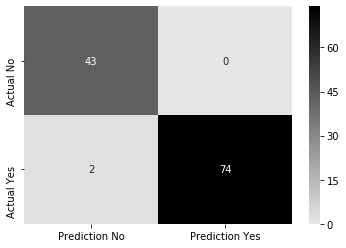

In [59]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [61]:
print(metrics.classification_report(y_test, predicted__td_y))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        43
         1.0       1.00      0.97      0.99        76

    accuracy                           0.98       119
   macro avg       0.98      0.99      0.98       119
weighted avg       0.98      0.98      0.98       119



## Question: Perform classification using Random Forest and explain the metrics

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfr = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=45)

In [65]:
rfr = rfr.fit(x_train,y_train)

In [66]:
rfr.score(x_train,y_train)

1.0

In [67]:
predicted__td_y = rfr.predict(x_test)

In [68]:
metrics.accuracy_score(y_test, predicted__td_y)


1.0

In [69]:
df_confusion = metrics.confusion_matrix(y_test, predicted__td_y)
df_confusion

array([[43,  0],
       [ 0, 76]], dtype=int64)

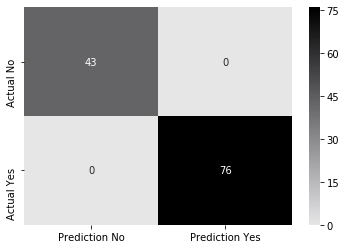

In [70]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

In [71]:
print(metrics.classification_report(y_test, predicted__td_y))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

